# Assignment 4 – MongoDB & PyMongo


In [18]:
#  a) Create collections “flights” inside database “airline_delayDB”

import pymongo
import pandas as pd
import json

if __name__ == "__main__":
    client = pymongo.MongoClient("mongodb://localhost:27017")
    print(client)
    db = client['airline_delayDB']
    collection = db['flights']
    collection.delete_many({})

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [19]:
# b) average arrival delay caused by airlines

data = pd.read_csv("C:/Python/Flights_Delay.csv")
payload = json.loads(data.to_json(orient = 'records'))
collection.insert_many(payload)


allDocuments = collection.aggregate([{'$group':{'_id':{},
                                    'average':{'$avg':'$ARRIVAL_DELAY'}}},
                                   {'$project':{'_id':0}}])
for item in allDocuments:
    print(item)

{'average': 7.545457931394093}


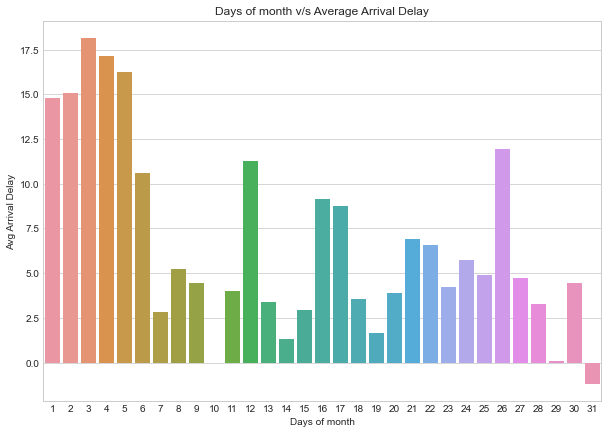

In [3]:
# c) Days of months with respect to average of arrival delays. 
#[Create a suitable plot using matplotlib/seaborn]

    
    
import matplotlib.pyplot as plt
import seaborn as sns
    
    
avg_delays = collection.aggregate([{'$group' : {'_id' : '$DAY',
                                    'Avg_Arrivaldelay' : {'$avg' : '$ARRIVAL_DELAY'}}}])
    
avg_delays1 = pd.DataFrame(avg_delays)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x = avg_delays1['_id'],y = avg_delays1['Avg_Arrivaldelay'])
plt.title('Days of month v/s Average Arrival Delay')
plt.xlabel("Days of month")
plt.ylabel("Avg Arrival Delay")
plt.show()

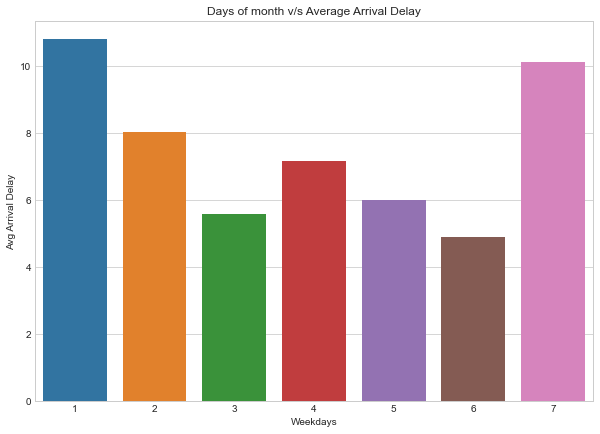

In [20]:
# d) Arrange weekdays with respect to the average arrival delays caused.
# [Create a suitable plot using matplotlib/seaborn]

    
avg_arrivaldelays = collection.aggregate([{'$group' : {'_id' : '$DAY_OF_WEEK',
                                         'Avg_Arrivaldelay' : {'$avg' : '$ARRIVAL_DELAY'}}}])
    
arrival_delays = pd.DataFrame(avg_arrivaldelays)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x = arrival_delays['_id'],y = arrival_delays['Avg_Arrivaldelay'])
plt.title('Days of month v/s Average Arrival Delay')
plt.xlabel("Weekdays")
plt.ylabel("Avg Arrival Delay")
plt.show()

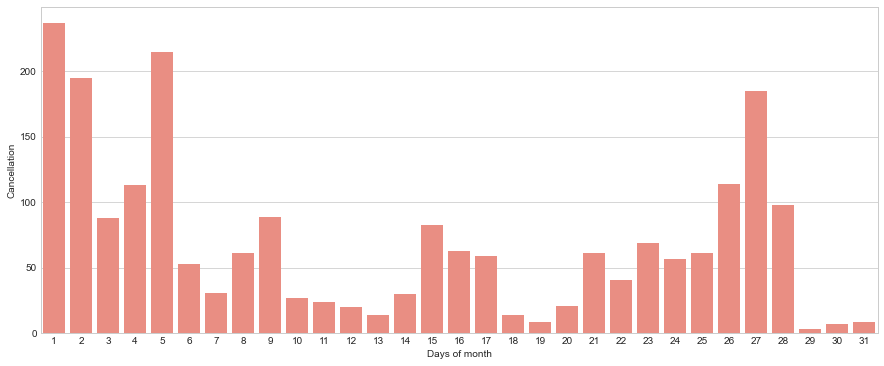

In [21]:
# e) Arrange Days of month as per cancellations done in descending order.  
 #[Create a suitable plot using matplotlib/seaborn]
   
 
all_documents = collection.aggregate([{'$group' : {'_id' : '$DAY',
                                    'totalCancellation' : {'$sum' : '$CANCELLED'}}},
                                    {'$sort' : {'totalCancellation' : -1}}])
    
        
all_docs1 = pd.DataFrame(all_documents)  
data = pd.read_csv("C:/Python/Flights_Delay.csv")
fig = plt.figure(figsize = (15,6))
sns.barplot(x = all_docs1['_id'],y = all_docs1['totalCancellation'],color = 'salmon')
plt.xlabel('Days of month')
plt.ylabel('Cancellation')
plt.show()

In [6]:
# f) Find the busiest airports with respect to day of week. 
# Create a suitable plot using matplotlib/seaborn.
    

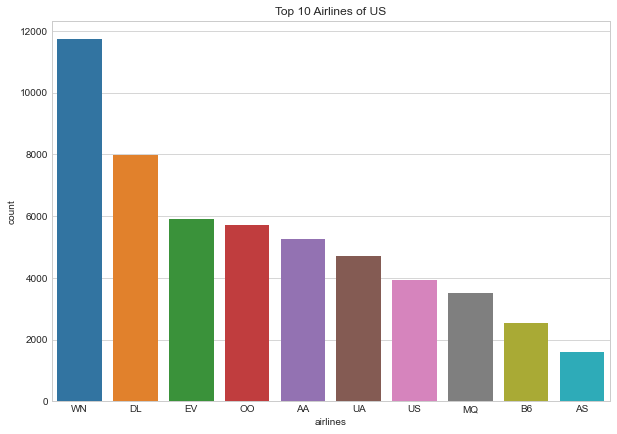

In [22]:
    
# g) Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn.

top_airlines = collection.aggregate([{'$group':{'_id':'$AIRLINE',
                                             'Count':{'$count':{}}}},
                                  {'$sort':{'Count': -1}}, {'$limit':10}])
    
airline_df=pd.DataFrame(top_airlines)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=airline_df['_id'],y=airline_df['Count'])
plt.title('Top 10 Airlines of US')
plt.xlabel('airlines')
plt.ylabel('count')
plt.show()

In [23]:
# h) Finding airlines that make the maximum, minimum number of cancellations.
    
                                          
min_maxcancellation = collection.aggregate([{'$group' : {'_id' : 'null',
                                            'max Cancellation':{ '$max' : '$CANCELLED'},
                                            'min cancellation' : {'$min':'$CANCELLED'}}},
                                            {'$project' : {'_id' : 0}}])
for item in min_maxcancellation:
    print(item)

{'max Cancellation': 1, 'min cancellation': 0}


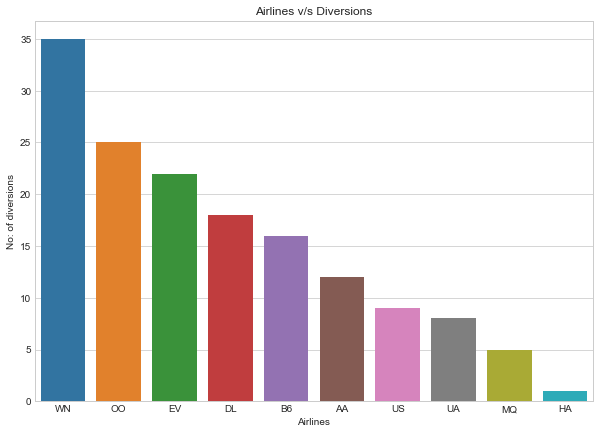

In [9]:
# i)  Find and show airlines names in descending that make the most number
# of diversions made. [Create a suitable plot using matplotlib/seaborn]

max_diversions = collection.aggregate([{'$match': {'DIVERTED' : 1 }},
                                        {'$group' : {'_id' : '$AIRLINE',
                                        'num_diversions' : {'$count' : {}}}},
                                        {'$sort' : {'num_diversions' : -1}}])
    
        
diverisons = pd.DataFrame(max_diversions)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=diverisons['_id'],y=diverisons['num_diversions'])
plt.title('Airlines v/s Diversions')
plt.xlabel('Airlines')
plt.ylabel('No: of diversions')
plt.show()

In [25]:
 # j) Finding days of month that see the most number of diversion
    
most_diversion = collection.aggregate([{'$match': {'DIVERTED' : 1 }},
                                        {'$group' : {'_id' : '$DAY',
                                        'num_diversions': {'$count' : {}}}},
                                        {'$sort'  : {'num_diversions' : -1}},
                                        {'$limit' : 1}])
    
for item in most_diversion:
    print(item)

{'_id': 2, 'num_diversions': 15}


In [26]:
 # k)Calculating mean and standard deviation of departure delay for all flights in minutes
    
departure_delay = collection.find({},{'DEPARTURE_DELAY':1,'_id':0})   
departure_delay_df=pd.DataFrame(departure_delay)
print("Mean = " ,departure_delay_df.mean())
print("StandardDeviation = ", departure_delay_df.std())

Mean =  DEPARTURE_DELAY    11.329091
dtype: float64
StandardDeviation =  DEPARTURE_DELAY    39.620916
dtype: float64


In [27]:
 # l) Calculating mean and standard deviation of arrival delay for all flights in minutes    

arrival_delay = collection.find({},{'ARRIVAL_DELAY':1,'_id':0}) 
arrival_delay_df=pd.DataFrame(arrival_delay)
print("Mean = ", arrival_delay_df.mean())
print("StandardDeviation = ",arrival_delay_df.std() )

Mean =  ARRIVAL_DELAY    7.545458
dtype: float64
StandardDeviation =  ARRIVAL_DELAY    42.378386
dtype: float64


In [13]:
# M) Create a partitioning table “flights_partition” using partitioned by schema “CANCELLED”


In [14]:
#N) Finding all diverted Route from a source to destination Airport & which route is the most diverted route.

most_diverted=collection.aggregate([{'$match':{'DIVERTED':1}},
                                    {'$group' :{'_id' : {'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT',
                                                         "DESTINATION_AIRPORT":'$DESTINATION_AIRPORT'},
                                    'count':{'$sum':1}}},
                                    {'$sort':{'count':-1}}
                                         ])
diverted_route=pd.DataFrame(most_diverted)
print("Diverted Route from a source to destination Airport \n",diverted_route['_id'])
diverted_max=diverted_route.get('count').max()
print("Most diverted Route : ",diverted_route[diverted_route['count']==diverted_max]['_id'])


Diverted Route from a source to destination Airport 
 0      {'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT...
1      {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
2      {'ORIGIN_AIRPORT': 'STT', 'DESTINATION_AIRPORT...
3      {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
4      {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
                             ...                        
137    {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT...
138    {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
139    {'ORIGIN_AIRPORT': 'MSP', 'DESTINATION_AIRPORT...
140    {'ORIGIN_AIRPORT': 'MCO', 'DESTINATION_AIRPORT...
141    {'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT...
Name: _id, Length: 142, dtype: object
Most diverted Route :  0    {'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT...
1    {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
2    {'ORIGIN_AIRPORT': 'STT', 'DESTINATION_AIRPORT...
3    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
4    {'ORIGIN_AIRPORT': 'IAH', 'DESTIN

In [15]:
#O) When is the best time of day/day of week/time of a year to fly with minimum delays ?
